# In-Depth Analysis: AlphaGo Zero's Revolutionary Learning Approach

# Table of Contents

1. [Introduction](#introduction)
   - Background of AlphaGo Zero's development and significance

2. [Evolution of AlphaGo](#evolution-of-alphago)
   - 2.1 [AlphaGo Fan](#alphago-fan)
   - 2.2 [AlphaGo Lee](#alphago-lee)

3. [AlphaGo Zero: A New Paradigm](#alphago-zero-a-new-paradigm)
   - 3.1 [Distinctions from Predecessors](#distinctions-from-predecessors)
   - 3.2 [Reinforcement Learning Algorithm](#reinforcement-learning-algorithm)
   - 3.3 [Neural Network Architecture](#neural-network-architecture)
   - 3.4 [Monte Carlo Tree Search (MCTS)](#monte-carlo-tree-search-mcts)
   - 3.5 [Policy Iteration](#policy-iteration)
   - 3.6 [Training Pipeline](#training-pipeline)
   - 3.7 [Self-Play Reinforcement Learning](#self-play-reinforcement-learning)
   - 3.8 [Training Loop](#training-loop)
   - 3.9 [Data Collection and Parameter Updates](#data-collection-and-parameter-updates)
   - 3.10 [Loss Function](#loss-function)

4. [Empirical Analysis of AlphaGo Zero Training](#empirical-analysis-of-alphago-zero-training)
   - 4.1 [Training Overview](#training-overview)
   - 4.2 [Performance Metrics](#performance-metrics)
   - 4.3 [Comparison to Supervised Learning](#comparison-to-supervised-learning)
   - 4.4 [Architectural and Algorithmic Contributions](#architectural-and-algorithmic-contributions)

5. [Knowledge Learned by AlphaGo Zero](#knowledge-learned-by-alphago-zero)
   - 5.1 [Discovery of Go Knowledge](#discovery-of-go-knowledge)
   - 5.2 [Final Performance of AlphaGo Zero](#final-performance-of-alphago-zero)
   - 5.3 [Significance of AlphaGo Zero's Learning](#significance-of-alphago-zero's-learning)

6. [Conclusion of the AlphaGo Zero Study](#conclusion-of-the-alphago-zero-study)
   - 6.1 [Reinforcement Learning Feasibility](#reinforcement-learning-feasibility)
   - 6.2 [Superior Performance](#superior-performance)
   - 6.3 [Final Observations](#final-observations)
   - 6.4 [Summary](#summary)

7. [Demo Code Implementation](Tic-Tac-Toe_implementation.ipynb)

8.  [Continuation of Analysis: AlphaGo Zero's Reinforcement Learning and MCTS](Mastering_the_game_of_Go_without_human_knowledge.pdf)

## Introduction

The paper titled "Mastering the Game of Go without Human Knowledge" authored by David Silver and colleagues at DeepMind represents a groundbreaking achievement in the field of artificial intelligence (AI). It introduces AlphaGo Zero, an AI program that acquired superhuman capabilities in the ancient board game Go, doing so entirely through self-play and without the aid of human-generated data.

## Evolution of AlphaGo

### AlphaGo Fan
The journey to AlphaGo Zero began with AlphaGo Fan, which was trained on human expert moves and utilized two neural networks—a policy network to determine move probabilities and a value network to evaluate board positions.

### AlphaGo Lee
The subsequent iteration, AlphaGo Lee, improved upon Fan by defeating 18-time international champion Lee Sedol. It followed a similar training approach but achieved even greater levels of play.

## AlphaGo Zero: A New Paradigm

### Distinctions from Predecessors
AlphaGo Zero represents a departure from previous versions in several key aspects:
- **Self-Play Reinforcement Learning**: It learns from scratch through self-play without human intervention.
- **Input Features**: It considers only the black and white stones on the board.
- **Unified Neural Network**: It employs a single network that integrates the policy and value networks.
- **Streamlined Tree Search**: It uses a tree search that depends solely on the neural network, eschewing Monte Carlo rollouts.

### Reinforcement Learning Algorithm
The core of AlphaGo Zero lies in its unique reinforcement learning algorithm, which employs a deep neural network parameterized by θ. This network inputs the raw board representation and outputs move probabilities and a value, streamlining the learning process.

### Neural Network Architecture
The network is constructed with residual blocks consisting of convolutional layers with batch normalization and rectifier nonlinearities. This design enables the network to serve dual functions: predicting move probabilities and estimating the game's outcome.

## Monte Carlo Tree Search (MCTS)

### Simulation Process
- **Traversal**: Each simulation within the MCTS traverses the search tree by selecting moves that maximize the action-value $ Q $, which is the mean outcome of the simulations that pass through that move. This value is augmented by an upper confidence bound $ U $, which is calculated from the move’s prior probability $ P $ and visit count $ N $.
- **Leaf Node Expansion**: When a simulation reaches a leaf node, the node is expanded. The position $ s $ associated with this node is evaluated by the neural network, which outputs a vector of probabilities $ P(s; a) $ for moves $ a $ from position $ s $ and a scalar evaluation $ V(s) $ of the position.
- **Backpropagation**: The action-values $ Q $ are updated to reflect the mean value of the evaluations $ V $ in the subtree below each action, effectively aggregating the insights gained from the simulated playouts.

### Search Probabilities and Temperature
- **Search Probabilities Output**: The search probabilities $ \pi $ are derived from the visit counts $ N $ of each move from the root position, adjusted by the temperature parameter $ \tau $, which controls exploration. When $ \tau $ approaches zero, the search becomes more deterministic, favoring moves with higher visit counts.

### Integration with Neural Network Training
- **Self-Play Reinforcement Learning**: The neural network parameters $ \theta $ are initially randomized and subsequently trained through self-play reinforcement learning. At each iteration, games are played by the MCTS using the latest network iteration.
- **Data Storage**: For each time step $ t $ within each game, data is stored in the form of a triplet $ (s_t, \pi_t, z_t) $, where $ z_t = \pm r_T $ indicates the winner from the perspective of the current player at step $ t $.

### Parameter Updates and Loss Function
- **Training the Network**: New parameters $ \theta_i $ are trained from the data to minimize the error between the network's predicted value $ v $ and the game outcome $ z $, and to maximize the similarity of the network's move probabilities $ p $ to the MCTS search probabilities $ \pi $.
- **Loss Function**: The parameters are adjusted using gradient descent on a loss function $ l $, which combines several components to guide the training:

  - A mean-squared error term for the value prediction: $ (z - v)^2 $
  - A cross-entropy term for aligning the predicted move probabilities with the MCTS probabilities: $ -\boldsymbol{\pi}^{\top} \log \mathbf{p} $
  - An L2 regularization term to prevent overfitting: $ c\|\theta\|^2 $

This is represented by the following formula:

$
l = (z - v)^2 - \boldsymbol{\pi}^{\top} \log(\mathbf{p}) + c\|\theta\|^2
$

In this formula, $ \mathbf{p} $ represents the predicted move probabilities from the neural network, $ v $ is the predicted value of the game's outcome, $ z $ is the actual game outcome, $ \boldsymbol{\pi} $ is the vector of search probabilities from MCTS, $ \theta $ are the neural network parameters, and $ c $ is the regularization parameter. This loss function effectively captures the performance of the neural network in terms of its predictive accuracy and generalization capability.

This MCTS coupled with the neural network allows AlphaGo Zero to perform a more efficient and targeted search,

 leading to a higher level of play without the need for external data or human expertise. The search process not only discovers the most promising moves to play but also generates valuable training data that improves the neural network over time, creating a powerful feedback loop that is central to AlphaGo Zero's success.

### Policy Iteration
The learning algorithm leverages the MCTS as both a policy improvement and evaluation operator. By iteratively updating the network's parameters to align with the search probabilities and game outcomes, AlphaGo Zero refines its strategy and decision-making capabilities.

### Training Pipeline
The self-play training cycle, as illustrated in Figure 1 (not included here), shows how each iteration of self-play feeds into the neural network's continuous learning and improvement.

## Self-Play Reinforcement Learning

The self-play component of AlphaGo Zero is a pivotal part of its learning strategy. Here's an outline of the process as described:

### Figure 1: The Self-Play Training Cycle

1. **Gameplay (a):** AlphaGo Zero plays games against itself, selecting moves based on search probabilities from MCTS using the latest neural network iteration.
2. **Terminal Position Scoring:** The final position of each game is scored to determine the winner $ z $.
3. **Neural Network Training (b):** The neural network processes the board position, outputs move probabilities $ p_t $ and a value $ v_t $, and then updates its parameters to maximize the similarity to the search probabilities and minimize the error to the actual game winner.

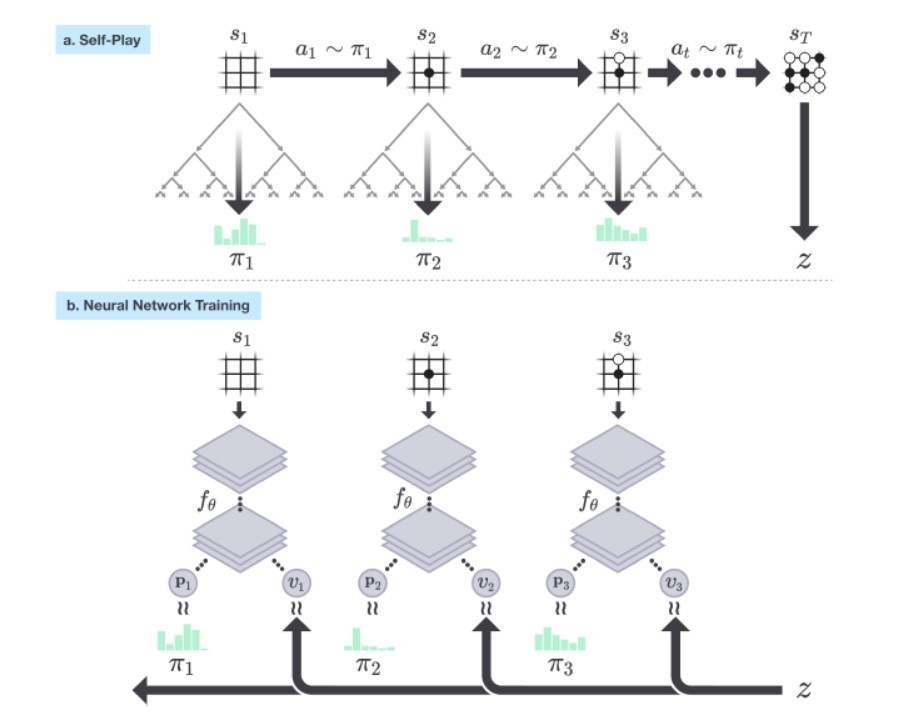

In [2]:
from IPython.display import Image

Image(filename='./Images/Fig_1.jpg', width=600, height=600)


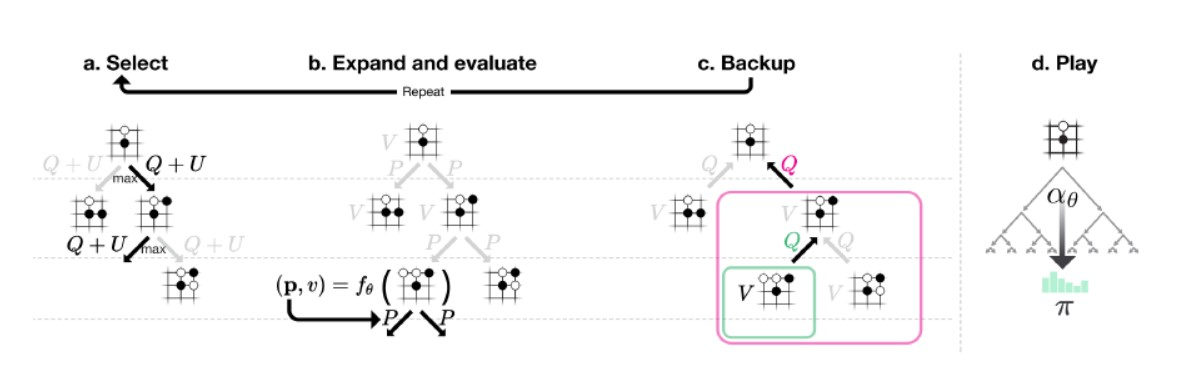

In [3]:
Image(filename='./Images/Fig_2.jpg', width=800, height=800)

## Empirical Analysis of AlphaGo Zero Training

### Training Overview

- **Duration:** AlphaGo Zero's training was conducted over approximately 3 days, starting from a random behavior base.
- **Self-Play Games:** A total of 4.9 million self-play games were generated.
- **MCTS Simulations:** Each move in these games used 1,600 simulations in the MCTS, equivalent to about 0.4 seconds of thinking time per move.
- **Mini-Batches:** The neural network parameters were updated from 700,000 mini-batches of 2,048 positions each.
- **Neural Network Structure:** The network comprised 20 residual blocks.

### Performance Metrics

- **Elo Rating Progression (Figure 3a):** The paper reports a smooth improvement in AlphaGo Zero's performance, measured in Elo rating, without the oscillations or catastrophic forgetting issues commonly mentioned in previous literature.
- **Surpassing AlphaGo Lee:** Remarkably, AlphaGo Zero exceeded the performance of AlphaGo Lee in just 36 hours, even though AlphaGo Lee had months of training.
- **Head-to-Head Match:** Under match conditions similar to the historic game against Lee Sedol, AlphaGo Zero, running on a single machine with 4 TPUs, defeated AlphaGo Lee, which ran on multiple machines with 48 TPUs, with a score of 100 to 0.

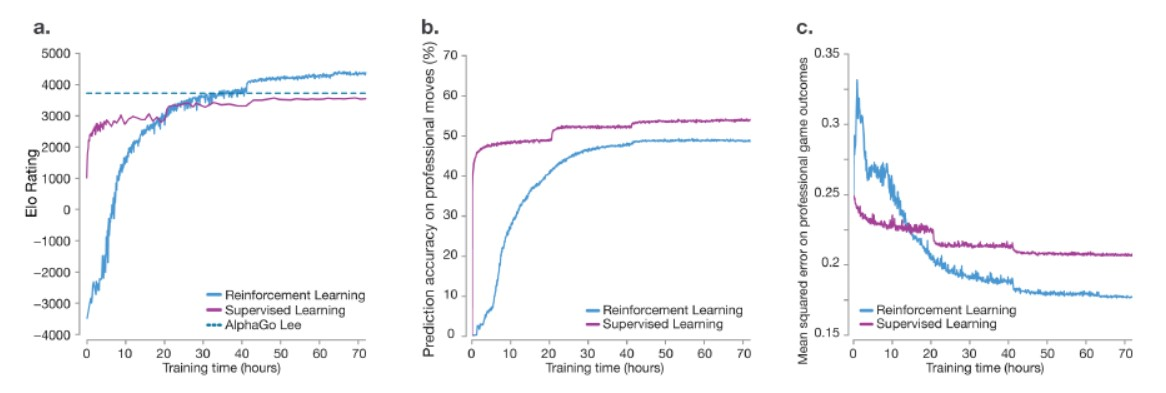

In [4]:
Image(filename='./Images/Fig_3.jpg', width=1000, height=1000)

### Comparison to Supervised Learning (Figure 3)

- **Second Neural Network Training:** A separate neural network was trained on the KGS dataset for move prediction and achieved state-of-the-art accuracy, showing the effectiveness of learning from human data.
- **Human Data vs. Self-Play Learning:** Despite supervised learning showing better initial performance and move prediction accuracy, the self-taught AlphaGo Zero outperformed the human-trained model within the first day of training. This indicates that AlphaGo Zero was possibly learning strategies that diverge from human gameplay.

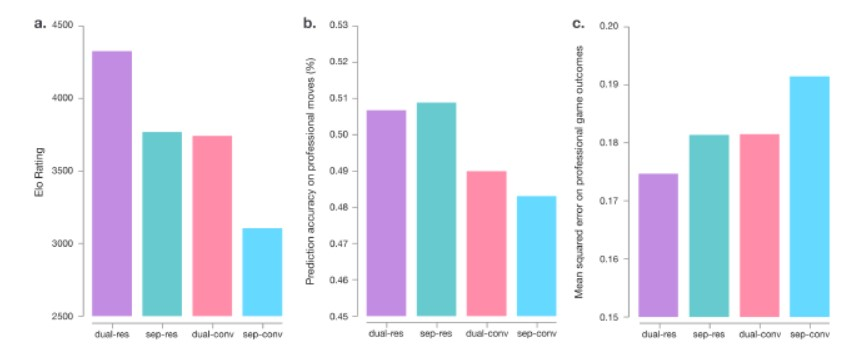

In [5]:
Image(filename='./Images/Fig_4.jpg', width=700, height=700)

### Architectural and Algorithmic Contributions

- **Architecture Comparison (Figure 4):** The paper compares the performance between the architecture used in AlphaGo Zero and that of AlphaGo Lee. It distinguishes between using separate networks for policy and value (as in AlphaGo Lee) versus a combined network (as in AlphaGo Zero).
- **Residual vs. Convolutional Networks:** The use of a residual network architecture led to more accurate predictions, lower error, and an increase in performance by over 600 Elo compared to the convolutional network architecture.
- **Dual Networks:** Merging the policy and value networks into one, although it slightly decreased move prediction accuracy, reduced value prediction error and further increased performance by approximately 600 Elo.
- **Computational Efficiency and Regularization:** The combined network not only provided computational efficiency but also regularized the network to a common representation that is beneficial for multiple tasks.

## Knowledge Learned by AlphaGo Zero

### Discovery of Go Knowledge

- **Joseki Discovery:** AlphaGo Zero independently discovered professional joseki (corner sequences) during training. Over time, it even developed new joseki variants, diverging from well-established human sequences.
  - **Timeline of Joseki (Figure 5a):** The paper provides a timeline of when traditional joseki were first played by AlphaGo Zero.
  - **Preference for New Joseki (Figure 5b):** As training progressed, AlphaGo Zero began to prefer new variants of joseki over those commonly used by human players.

- **Understanding of Go Concepts:** AlphaGo Zero progressed from random moves to a sophisticated understanding of Go concepts such as fuseki (opening), tesuji (tactics), life-and-death, ko, yose (endgame), and more.
  - **Late Understanding of Shicho:** Notably, the concept of shicho ("ladder" capture), typically one of the first learned by human players, was only grasped later in AlphaGo Zero's training.

### Final Performance of AlphaGo Zero

- **Extended Training:** A second instance of AlphaGo Zero was trained with a larger neural network for about 40 days.
  - **Self-Play Games:** It generated 29 million games of self-play.
  - **Updates:** The parameters were updated from 3.1 million mini-batches of 2,048 positions each.
  - **Neural Network Size:** This network had 40 residual blocks.

- **Internal Tournament Evaluation:** AlphaGo Zero was evaluated against other versions of AlphaGo and previous Go programs.
  - **Performance Ratings (Figure 6b):** The raw neural network achieved an Elo rating of 3,055. AlphaGo Zero itself achieved 5,185, surpassing all other versions, including AlphaGo Master, which had a rating of 4,858.

- **Head-to-Head Match Against AlphaGo Master:** AlphaGo Zero played against AlphaGo Master in a 100-game match and won 89 games to 11.

### Significance of AlphaGo Zero's Learning

The section underscores AlphaGo Zero's ability to self-learn and develop Go knowledge that includes and goes beyond human strategies. It demonstrates that given enough computational power and time, AI can discover established human knowledge and create novel strategies that have not been seen before. This finding is significant because it suggests that AI has the potential to discover new knowledge in fields where humans have centuries of accumulated expertise. It also highlights that such AI systems can potentially learn more efficiently and reach higher performance levels than human-based training approaches.



## Conclusion of the AlphaGo Zero Study

### Reinforcement Learning Feasibility

- **Pure Reinforcement Learning:** The study confirms that pure reinforcement learning can achieve superhuman performance without any human examples or guidance. This is significant in showing the capability of reinforcement learning to excel in complex domains.

- **Training Efficiency:** A pure reinforcement learning approach not only requires a comparable amount of training time (only a few hours more) but also achieves superior performance compared to methods that rely on human expert data.

### Superior Performance

- **Asymptotic Performance:** The approach utilized by AlphaGo Zero demonstrates a much better asymptotic performance, meaning that its potential for improvement over time surpasses that of systems trained on human expert moves.

- **Elo Ratings (Figure 6a):** AlphaGo Zero's learning curve over 40 days with a 40-block residual network shows consistent improvement and a high Elo rating, indicating its increasing strength over time.

- **Tournament Results (Figure 6b):** In a tournament setting, AlphaGo Zero outperformed all previous versions of AlphaGo and other Go programs, showcasing its dominance in the domain of Go.

### Final Observations

- **AlphaGo Zero's Uniqueness:** The success of AlphaGo Zero underlines the power of a system that can learn and refine its strategy purely from self-play, without any prior domain knowledge except the rules of the game.

- **Implications for AI Research:** This work implies that artificial intelligence can independently learn and create knowledge and strategies that surpass human expertise, a groundbreaking realization for AI research.

- **Impact on Future AI Systems:** The techniques developed for AlphaGo Zero can potentially be applied to other domains, suggesting that AI can achieve significant breakthroughs in areas that are currently limited by the availability of human expert data.

### Summary

AlphaGo Zero's innovative training methodology and streamlined architecture represent a remarkable milestone in artificial intelligence. Its ability to learn and excel in the complex domain of Go through deep neural networks and reinforcement learning challenges the traditional reliance on human expert data. This approach not only enabled AlphaGo Zero to outperform its predecessors but also demonstrated a significant leap in AI's capacity for autonomous learning. The 100-0 victory over the previous version of AlphaGo symbolizes a turning point in the pursuit of AI systems that can independently master complex intellectual tasks. The study's findings open new pathways for AI to develop sophisticated strategies and knowledge autonomously, promising a future where AI can potentially discover and refine knowledge beyond human expertise.


[Table of Contents](#table-of-contents)